In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

#### Exploring and preprocessing dataset

In [62]:
data = pd.read_csv(r'data\Student data.csv')
adjusted_data = data[23:]
column_names = ['1st Term GPA', '2nd Term GPA', 'First Language', 'Funding', 'School', 'Fast Track', 'Coop',
                'Residency', 'Gender', 'Prev Education', 'Age Group', 'High School Average Mark', 'Math Score',
                'English Grade', 'FirstYearPersistence']
adjusted_data.columns = column_names

# Convert the data types of the columns to the appropriate types

#* Numeric columns

numeric_columns = ['1st Term GPA', '2nd Term GPA', 'High School Average Mark', 'Math Score']

cat_columns = ['First Language', 'Funding', 'School', 'Fast Track', 'Coop', 'Residency', 'Gender', 'Prev Education', 'Age Group', 'English Grade', 'FirstYearPersistence']

# Convert numeric columns to numeric, coercing errors to NaN
adjusted_data[numeric_columns] = adjusted_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convert categorical columns to category type
adjusted_data[cat_columns] = adjusted_data[cat_columns].astype('object')

In [69]:
adjusted_data

,1st Term GPA,2nd Term GPA,First Language,Funding,School,Fast Track,Coop,Residency,Gender,Prev Education,Age Group,High School Average Mark,Math Score,English Grade,FirstYearPersistence
0,0.000000,0.000000,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,59.0,16.0,7,1.0
1,2.500000,2.000000,3,4.0,6.0,1.0,2.0,2.0,2.0,1,3,NaN,NaN,7,1.0
2,4.250000,3.923077,1,1.0,6.0,2.0,1.0,1.0,1.0,2,3,92.0,41.0,9,1.0
3,3.020833,2.321429,3,4.0,6.0,1.0,2.0,2.0,2.0,2,3,NaN,NaN,8,1.0
4,4.275000,4.326923,1,2.0,6.0,1.0,1.0,1.0,1.0,2,3,97.0,NaN,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,1.413043,0.000000,?,4.0,6.0,2.0,2.0,2.0,2.0,1,1,NaN,47.0,10,0.0
1433,4.360000,4.074074,1,2.0,6.0,1.0,1.0,1.0,1.0,2,4,NaN,NaN,10,1.0
1434,2.020833,2.450000,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,78.0,18.0,9,1.0
1435,4.021739,4.357143,?,4.0,6.0,2.0,1.0,2.0,1.0,1,2,NaN,46.0,8,1.0


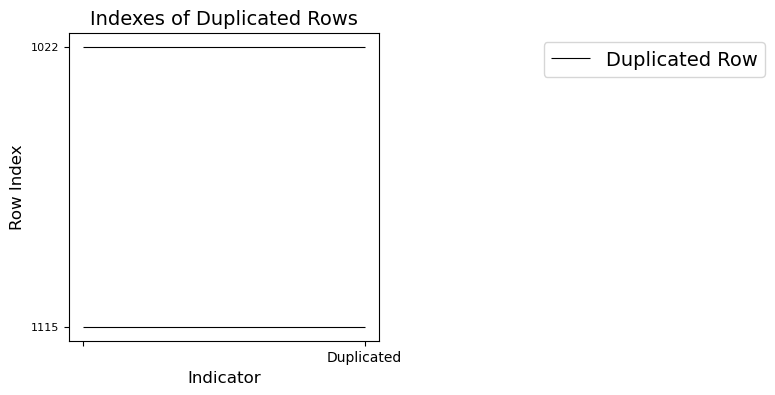

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Reset the index of the DataFrame
adjusted_data = adjusted_data.reset_index(drop=True)

# Identify duplicated rows
duplicated_rows = pd.DataFrame({
    'duplicated': adjusted_data.duplicated(keep=False),  # Consider all duplicates
    'row': adjusted_data.index  # Use the DataFrame's index as row identifiers
})

# Filter only duplicated rows
duplicated_rows = duplicated_rows[duplicated_rows['duplicated']]

# Plot duplicated rows
plt.figure(figsize=(4, 4))
plt.hlines(duplicated_rows['row'], xmin=0, xmax=1, colors='black', linewidth=0.8, label='Duplicated Row')
plt.gca().invert_yaxis()  # Invert y-axis if necessary
plt.title('Indexes of Duplicated Rows', fontsize=14)
plt.xlabel('Indicator', fontsize=12)
plt.ylabel('Row Index', fontsize=12)
plt.xticks([0, 1], labels=['', 'Duplicated'], fontsize=10)
plt.yticks(duplicated_rows['row'], labels=duplicated_rows['row'], fontsize=8)  # Explicitly set row indices as y-tick labels

# Position the legend outside the graph
plt.legend(loc='upper left', bbox_to_anchor=(1.5, 1))
plt.tight_layout()
plt.show()


In [74]:
# Identify duplicated rows
duplicated_rows = adjusted_data[adjusted_data.duplicated(keep=False)]
duplicated_rows



,1st Term GPA,2nd Term GPA,First Language,Funding,School,Fast Track,Coop,Residency,Gender,Prev Education,Age Group,High School Average Mark,Math Score,English Grade,FirstYearPersistence
1022,0.0,NaN,3,4.0,6.0,1.0,2.0,2.0,2.0,1,3,NaN,NaN,8,0.0
1115,0.0,NaN,3,4.0,6.0,1.0,2.0,2.0,2.0,1,3,NaN,NaN,8,0.0


In [ ]:
# Replace '?' with NaN
adjusted_data.replace('?', np.nan, inplace=True)

In [ ]:
adjusted_data

,1st Term GPA,2nd Term GPA,First Language,Funding,School,Fast Track,Coop,Residency,Gender,Prev Education,Age Group,High School Average Mark,Math Score,English Grade,FirstYearPersistence
23,0.000000,0.000000,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,59.0,16.0,7,1.0
24,2.500000,2.000000,3,4.0,6.0,1.0,2.0,2.0,2.0,1,3,NaN,NaN,7,1.0
25,4.250000,3.923077,1,1.0,6.0,2.0,1.0,1.0,1.0,2,3,92.0,41.0,9,1.0
26,3.020833,2.321429,3,4.0,6.0,1.0,2.0,2.0,2.0,2,3,NaN,NaN,8,1.0
27,4.275000,4.326923,1,2.0,6.0,1.0,1.0,1.0,1.0,2,3,97.0,NaN,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.413043,0.000000,NaN,4.0,6.0,2.0,2.0,2.0,2.0,1,1,NaN,47.0,10,0.0
1456,4.360000,4.074074,1,2.0,6.0,1.0,1.0,1.0,1.0,2,4,NaN,NaN,10,1.0
1457,2.020833,2.450000,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,78.0,18.0,9,1.0
1458,4.021739,4.357143,NaN,4.0,6.0,2.0,1.0,2.0,1.0,1,2,NaN,46.0,8,1.0


1

In [ ]:
visualization =  adjusted_data.copy().reset_index(drop=True)

In [ ]:
visualization.shape

(1437, 15)

In [ ]:
visualization

,1st Term GPA,2nd Term GPA,First Language,Funding,School,Fast Track,Coop,Residency,Gender,Prev Education,Age Group,High School Average Mark,Math Score,English Grade,FirstYearPersistence
0,0.000000,0.000000,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,59.0,16.0,7,1.0
1,2.500000,2.000000,3,4.0,6.0,1.0,2.0,2.0,2.0,1,3,NaN,NaN,7,1.0
2,4.250000,3.923077,1,1.0,6.0,2.0,1.0,1.0,1.0,2,3,92.0,41.0,9,1.0
3,3.020833,2.321429,3,4.0,6.0,1.0,2.0,2.0,2.0,2,3,NaN,NaN,8,1.0
4,4.275000,4.326923,1,2.0,6.0,1.0,1.0,1.0,1.0,2,3,97.0,NaN,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,1.413043,0.000000,NaN,4.0,6.0,2.0,2.0,2.0,2.0,1,1,NaN,47.0,10,0.0
1433,4.360000,4.074074,1,2.0,6.0,1.0,1.0,1.0,1.0,2,4,NaN,NaN,10,1.0
1434,2.020833,2.450000,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,78.0,18.0,9,1.0
1435,4.021739,4.357143,NaN,4.0,6.0,2.0,1.0,2.0,1.0,1,2,NaN,46.0,8,1.0


In [ ]:
visualization["FirstYearPersistence"].value_counts(dropna=False)

FirstYearPersistence
1.0    1138
0.0     299
Name: count, dtype: int64

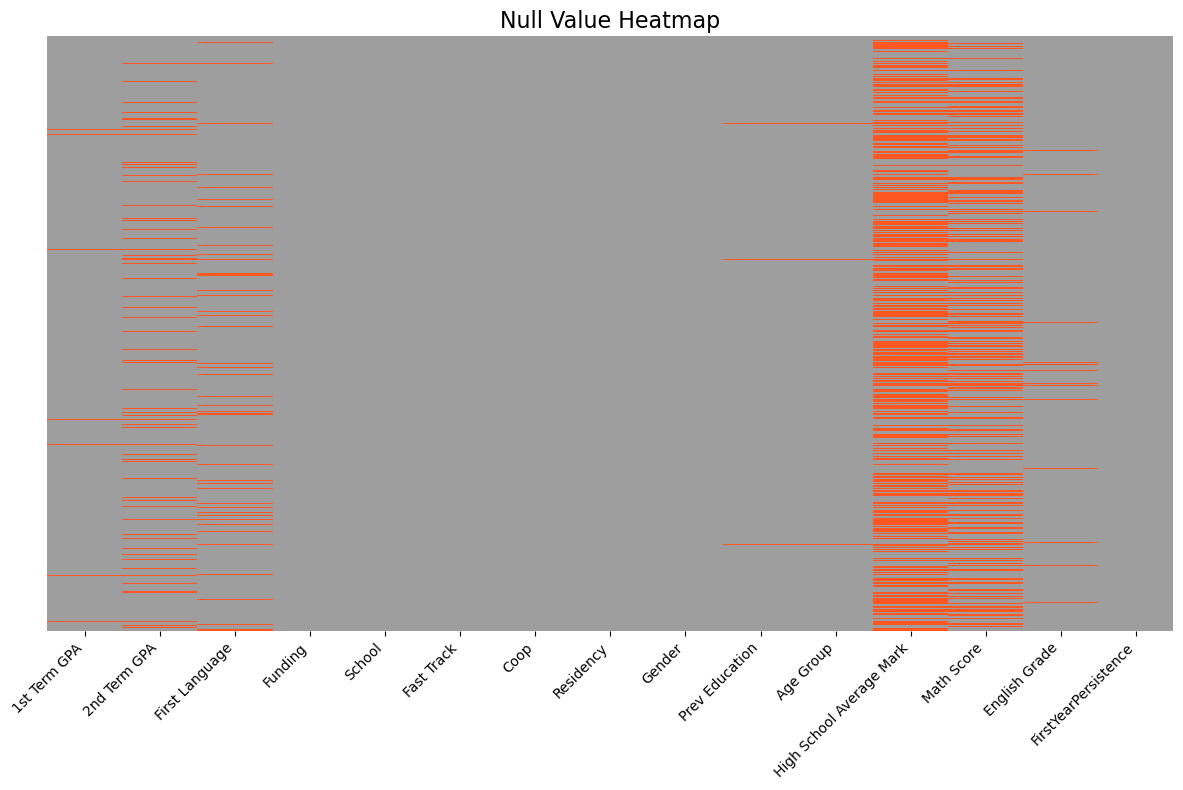

In [ ]:

from matplotlib.colors import ListedColormap

# Create a custom colormap with gray for non-null and orange for null values
custom_cmap = ListedColormap(['#9E9E9E', '#FF5722'])

# Example adjusted heatmap
plt.figure(figsize=(12, 8))  # Increase figure size for better spacing
sns.heatmap(visualization.isnull(), cbar=False, cmap=custom_cmap, yticklabels=False)

# Set title
plt.title("Null Value Heatmap", fontsize=16)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate and align labels to the right

# Adjust layout to avoid label overlap
plt.tight_layout()

# Display the heatmap
plt.show()


In [ ]:
#mapping values for visualization

language_map = {"1":'English', "2":'French', "3":'Other'}
visualization['First Language'] = visualization['First Language'].map(language_map)

funding_map = {1:"Apprentice_PS" , 2: "GPOG_FT", 3:"Intl Offshore", 4: "Intl Regular", 5:"Intl Transfer", 6:"Joint Program Ryerson", 7:"Joint Program UTSC", 8:"Second Career Program", 9:"Work Safety Insurance Board"}
visualization['Funding'] = visualization['Funding'].map(funding_map)

fastrack_map = {1: "Yes", 2: "No"}
visualization['Fast Track'] = visualization['Fast Track'].map(fastrack_map)

coop_map = {1: "Yes", 2: "No"}
visualization['Coop'] = visualization['Coop'].map(coop_map)

residency_map = {1: "Domestic", 2: "International"}
visualization['Residency'] = visualization['Residency'].map(residency_map)

gender_map = {1: "Female", 2: "Male", 3:"Neutral"}
visualization['Gender'] = visualization['Gender'].map(gender_map)

prevEducation_map = {"1": "HighSchool", "2": "PostSecondary", "0":"0"}
visualization['Prev Education'] = visualization['Prev Education'].map(prevEducation_map)

age_map={"1":"0 to 18", "2": "19 to 20", "3": "21 to 25", "4":"26 to 30", 
         "5":"31 to 35" , "6":"36 to 40", "7": "41 to 50", "8":"51 to 60", "9": "61 to 65", "10":"66+"}
visualization['Age Group'] = visualization['Age Group'].map(age_map)


english_map={"1": "Level-130", "2": "Level-131", "3":"Level-140", "4":"Level-141", "5": "Level-150", "6": "Level-151",
  "7": "Level-160", "8":"Level-161", "9": "Level-170", "10": "Level-171", "11": "Level-180"}


visualization['English Grade'] = visualization['English Grade'].map(english_map)






In [ ]:
visualization.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   1st Term GPA              1420 non-null   float64
 1   2nd Term GPA              1277 non-null   float64
 2   First Language            1326 non-null   object 
 3   Funding                   1437 non-null   object 
 4   School                    1437 non-null   object 
 5   Fast Track                1437 non-null   object 
 6   Coop                      1437 non-null   object 
 7   Residency                 1437 non-null   object 
 8   Gender                    1437 non-null   object 
 9   Prev Education            1433 non-null   object 
 10  Age Group                 1433 non-null   object 
 11  High School Average Mark  694 non-null    float64
 12  Math Score                975 non-null    float64
 13  English Grade             1392 non-null   object 
 14  FirstYea

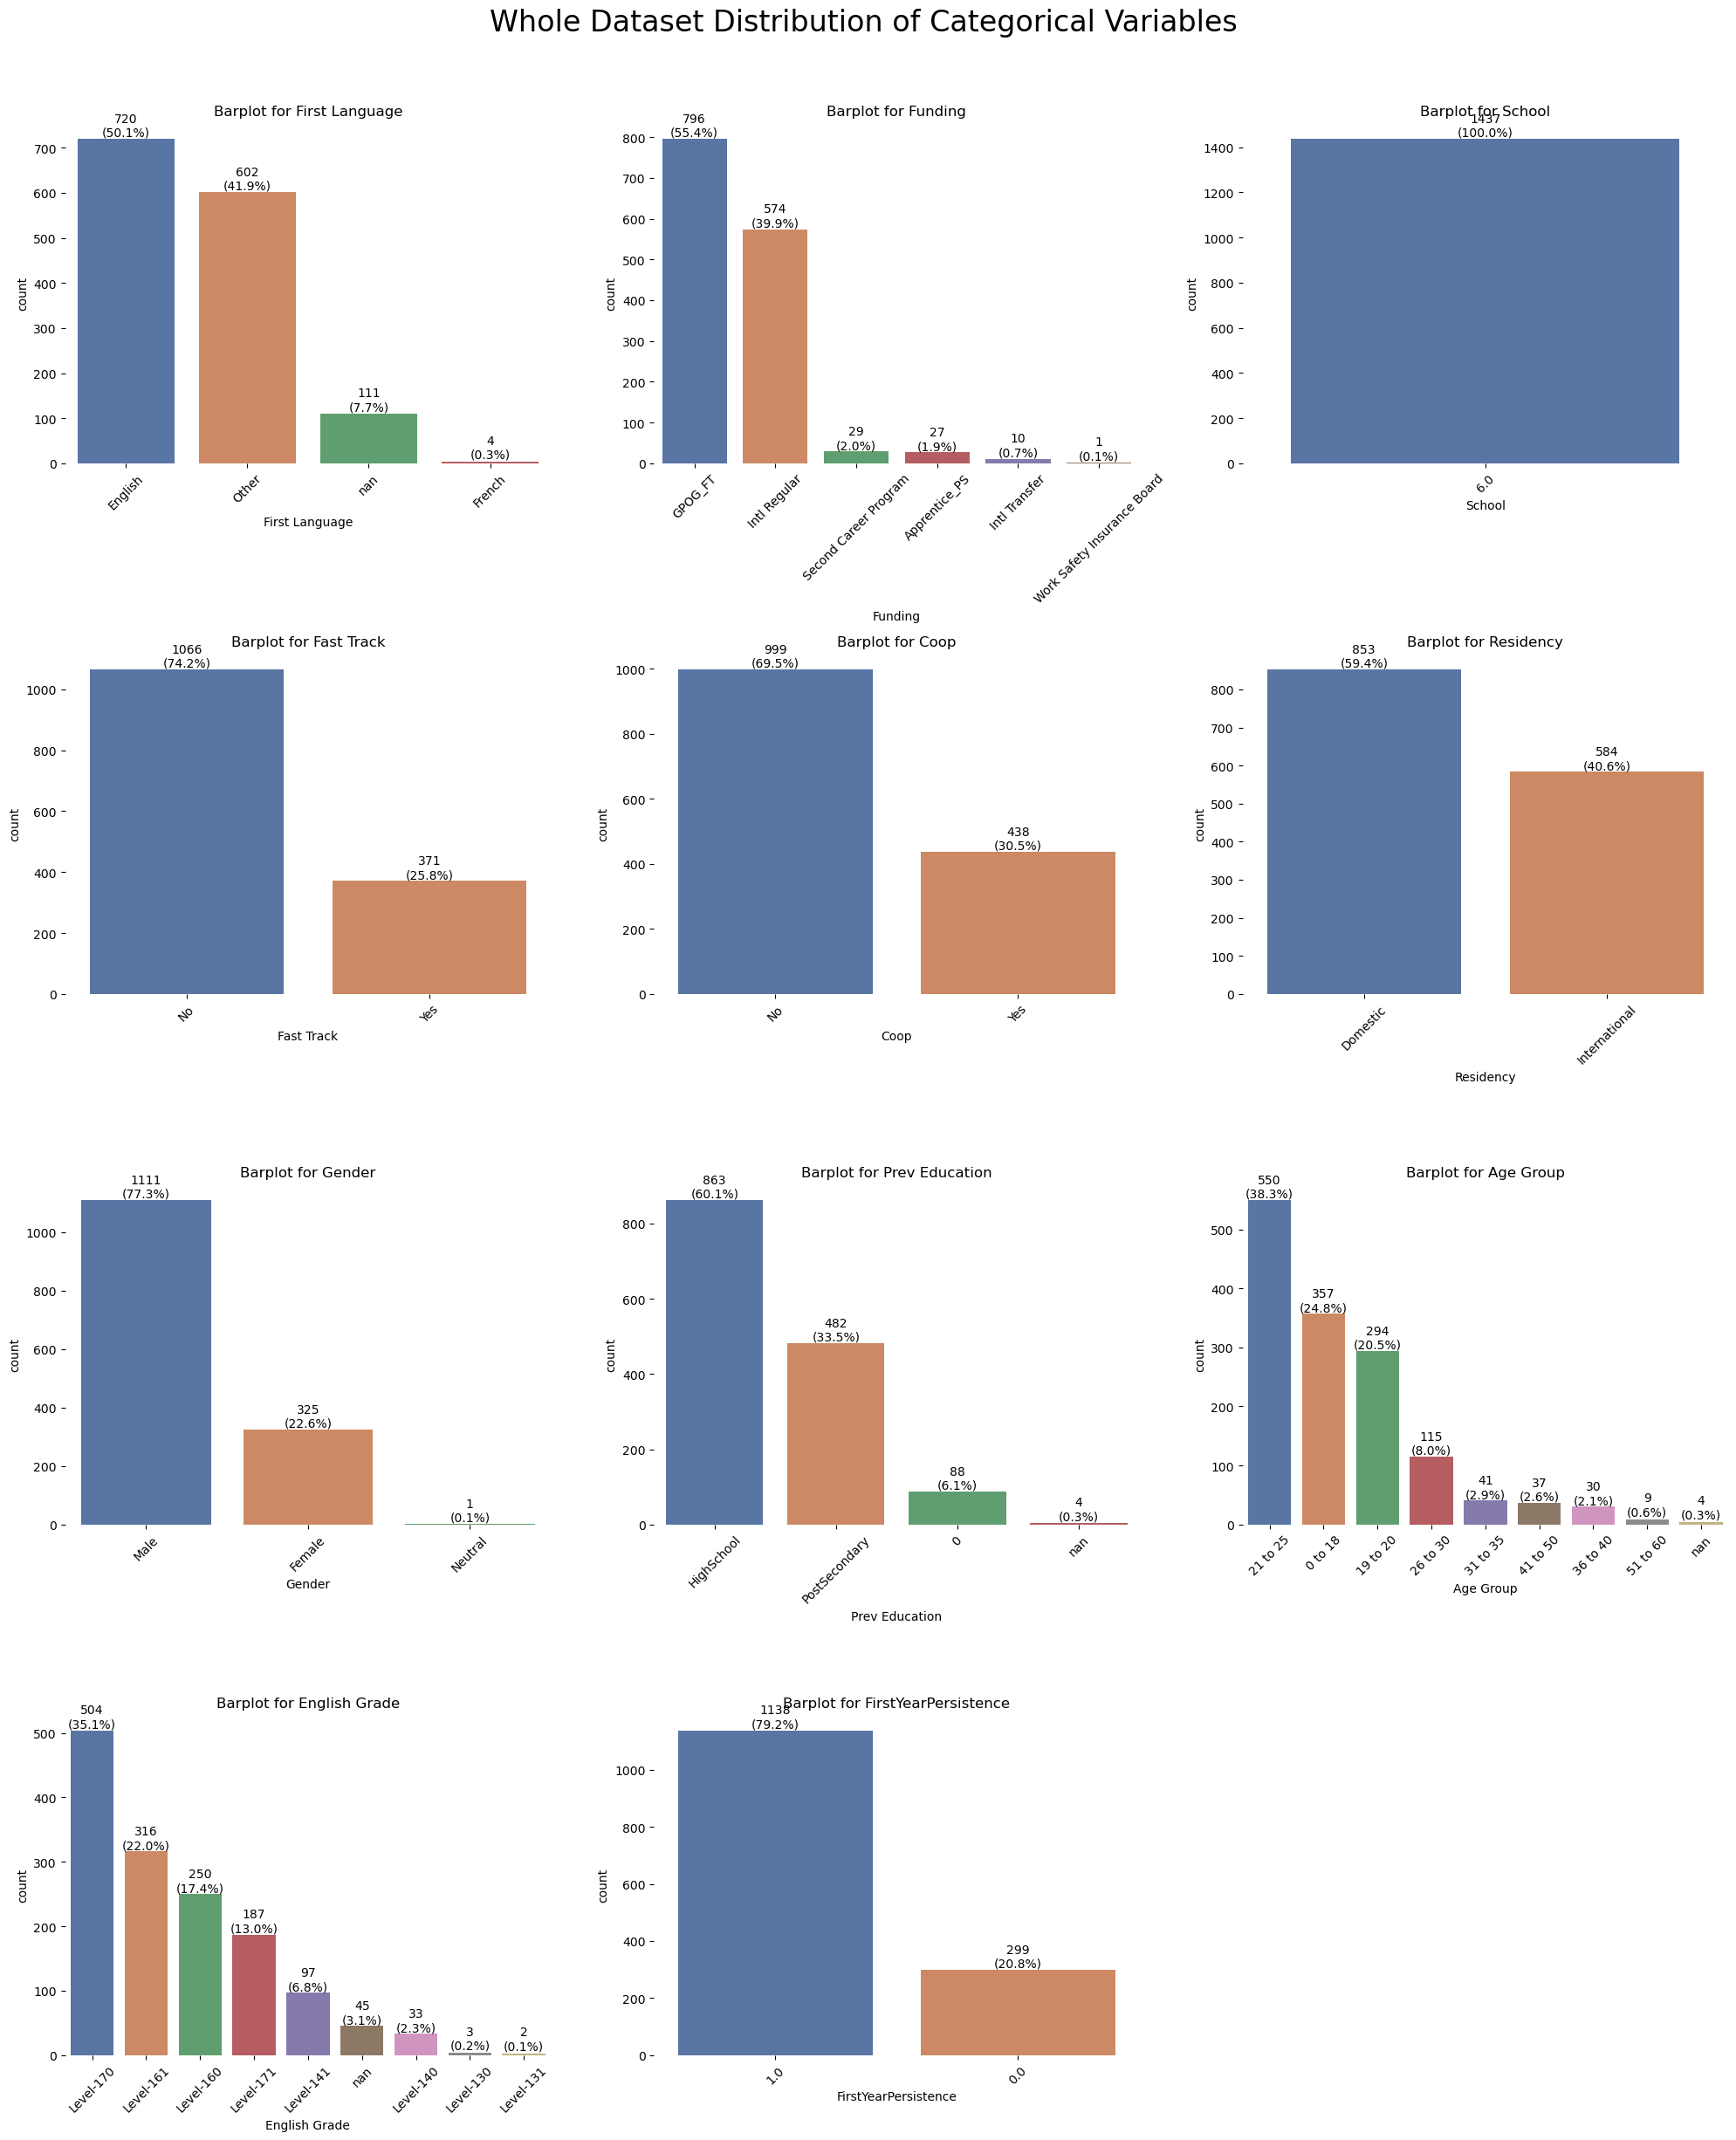

In [ ]:
visualization[cat_columns] = visualization[cat_columns].astype(str)
cat_columns =visualization.select_dtypes(object).columns
cat_columns=cat_columns.to_list()


fig, axes = plt.subplots(4, 3, figsize=(20, 24))  # Adjust size for clarity

fig.suptitle("Whole Dataset Distribution of Categorical Variables ", fontsize=24, y=1.02)  # Adjust 'y' for spacing

# Flatten axes for easy iteration
axes = axes.flatten()

for idx,i in enumerate(cat_columns):
    df = pd.DataFrame(visualization[i].value_counts()).reset_index()
    df.columns = [i, "count"]
    df["percentage"] = (df["count"] / df["count"].sum()) * 100

    
 
    sns.barplot(df, x = i, y = "count", ax=axes[idx], palette = "deep")
    axes[idx].set_title(f"Barplot for {i}")
    axes[idx].tick_params(axis='x', rotation=45)

      # Annotate counts and percentages on the bars
    for p, perc, count in zip(axes[idx].patches, df["percentage"], df["count"]):
        height = p.get_height()
        if height > 10:  # Place annotation above the bar for larger bars
            axes[idx].annotate(f'{count}\n({perc:.1f}%)',
                               (p.get_x() + p.get_width() / 2., height),
                               ha='center', va='bottom', fontsize=10)
        else:  # Place annotation inside the bar for smaller bars
            axes[idx].annotate(f'{count}\n({perc:.1f}%)',
                               (p.get_x() + p.get_width() / 2., height + 2),
                               ha='center', va='bottom', fontsize=10, color='black')
    
    # Remove the box (spines)
    for spine in axes[idx].spines.values():
        spine.set_visible(False)

for j in range(len(cat_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


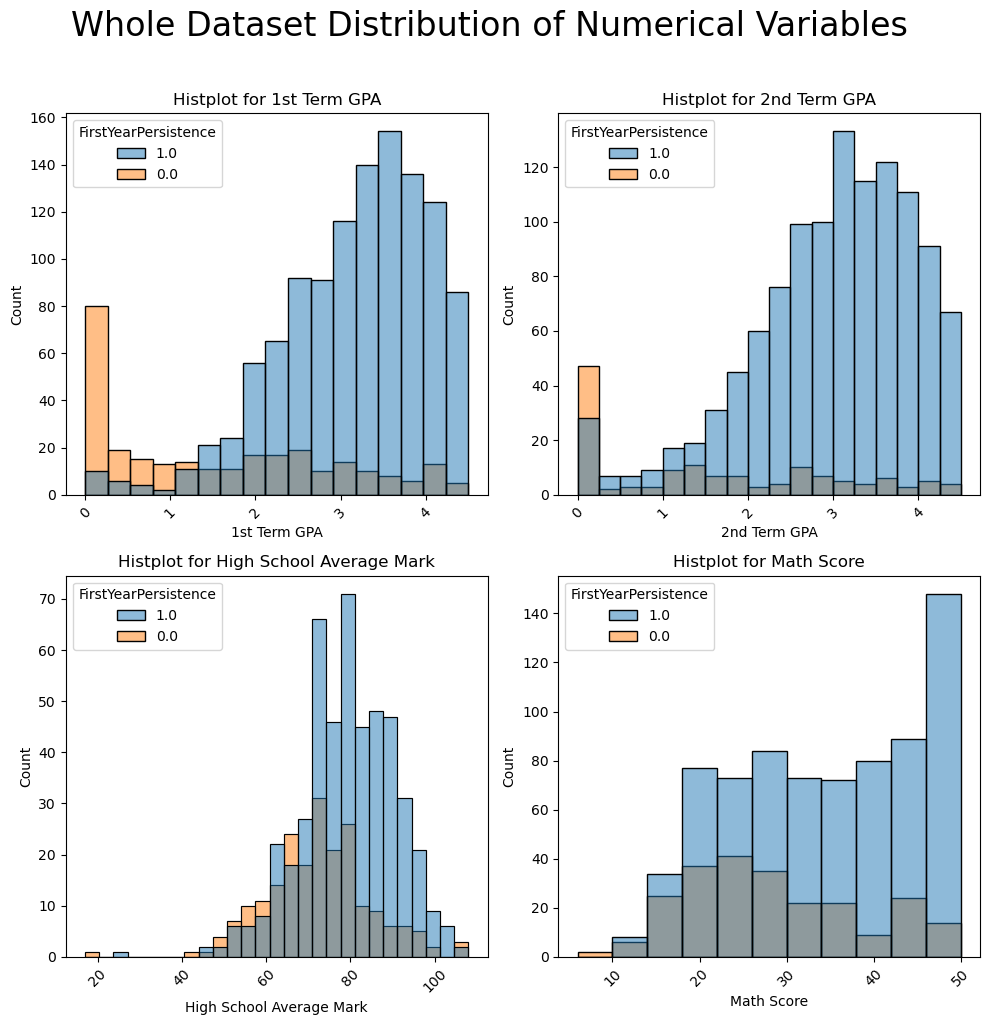

In [ ]:
num_col=visualization.select_dtypes('Float64').columns.to_list()

fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Adjust size for clarity

fig.suptitle("Whole Dataset Distribution of Numerical Variables ", fontsize=24, y=1.02)  # Adjust 'y' for spacing

# Flatten axes for easy iteration
axes = axes.flatten()

for idx,i in enumerate(num_col):
    sns.histplot(visualization, x = i, ax=axes[idx], hue ="FirstYearPersistence")
    axes[idx].set_title(f"Histplot for {i}")
    axes[idx].tick_params(axis='x', rotation=45)

for j in range(len(cat_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
    




In [ ]:
df_boxplot = visualization.copy()





persistence_map={"1.0": "persisted", "0.0": "did not persist"}

df_boxplot['FirstYearPersistence'] = df_boxplot['FirstYearPersistence'].map(persistence_map)

In [ ]:
df_boxplot

,1st Term GPA,2nd Term GPA,First Language,Funding,School,Fast Track,Coop,Residency,Gender,Prev Education,Age Group,High School Average Mark,Math Score,English Grade,FirstYearPersistence
0,0.000000,0.000000,English,GPOG_FT,6.0,No,Yes,Domestic,Male,HighSchool,0 to 18,59.0,16.0,Level-160,persisted
1,2.500000,2.000000,Other,Intl Regular,6.0,Yes,No,International,Male,HighSchool,21 to 25,NaN,NaN,Level-160,persisted
2,4.250000,3.923077,English,Apprentice_PS,6.0,No,Yes,Domestic,Female,PostSecondary,21 to 25,92.0,41.0,Level-170,persisted
3,3.020833,2.321429,Other,Intl Regular,6.0,Yes,No,International,Male,PostSecondary,21 to 25,NaN,NaN,Level-161,persisted
4,4.275000,4.326923,English,GPOG_FT,6.0,Yes,Yes,Domestic,Female,PostSecondary,21 to 25,97.0,NaN,Level-170,persisted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,1.413043,0.000000,nan,Intl Regular,6.0,No,No,International,Male,HighSchool,0 to 18,NaN,47.0,Level-171,did not persist
1433,4.360000,4.074074,English,GPOG_FT,6.0,Yes,Yes,Domestic,Female,PostSecondary,26 to 30,NaN,NaN,Level-171,persisted
1434,2.020833,2.450000,English,GPOG_FT,6.0,No,Yes,Domestic,Male,HighSchool,0 to 18,78.0,18.0,Level-170,persisted
1435,4.021739,4.357143,nan,Intl Regular,6.0,No,Yes,International,Female,HighSchool,19 to 20,NaN,46.0,Level-161,persisted


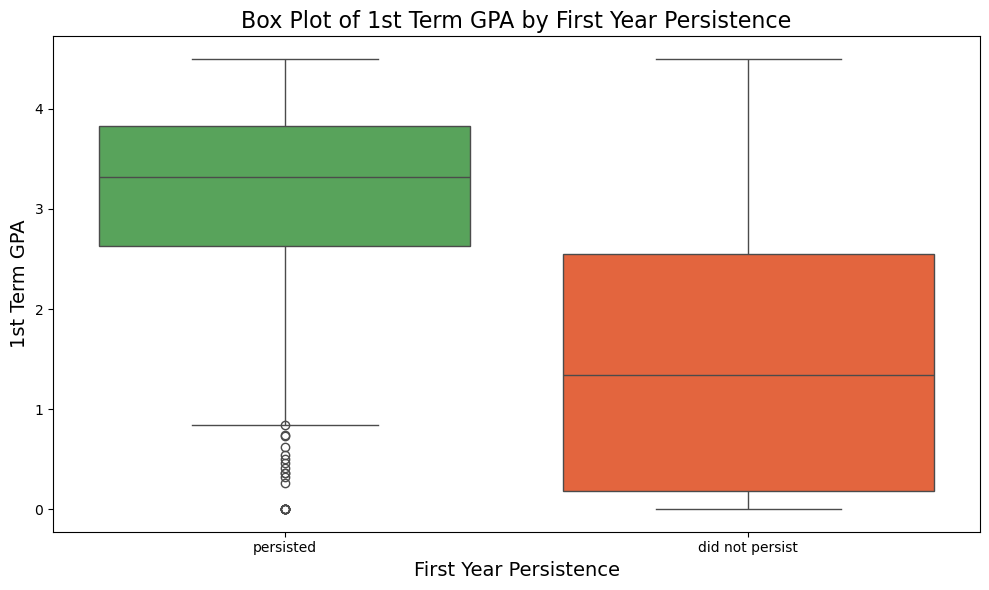

In [ ]:


# Define a custom color palette
custom_palette = {
    "did not persist": "#FF5722",  # Orange for "did not persist"
    "persisted": "#4CAF50"         # Gray for "persisted"
}

plt.figure(figsize=(10, 6))  # Adjust figure size
sns.boxplot(
    data=df_boxplot, 
    y="1st Term GPA", 
    x="FirstYearPersistence", 
    hue="FirstYearPersistence", 
    palette=custom_palette  # Apply the custom palette
)

# Add title and axis labels
plt.title("Box Plot of 1st Term GPA by First Year Persistence", fontsize=16)
plt.xlabel("First Year Persistence", fontsize=14)
plt.ylabel("1st Term GPA", fontsize=14)


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()




In [ ]:
visualization

,1st Term GPA,2nd Term GPA,First Language,Funding,School,Fast Track,Coop,Residency,Gender,Prev Education,Age Group,High School Average Mark,Math Score,English Grade,FirstYearPersistence
0,0.000000,0.000000,English,GPOG_FT,6.0,No,Yes,Domestic,Male,HighSchool,0 to 18,59.0,16.0,Level-160,1.0
1,2.500000,2.000000,Other,Intl Regular,6.0,Yes,No,International,Male,HighSchool,21 to 25,NaN,NaN,Level-160,1.0
2,4.250000,3.923077,English,Apprentice_PS,6.0,No,Yes,Domestic,Female,PostSecondary,21 to 25,92.0,41.0,Level-170,1.0
3,3.020833,2.321429,Other,Intl Regular,6.0,Yes,No,International,Male,PostSecondary,21 to 25,NaN,NaN,Level-161,1.0
4,4.275000,4.326923,English,GPOG_FT,6.0,Yes,Yes,Domestic,Female,PostSecondary,21 to 25,97.0,NaN,Level-170,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,1.413043,0.000000,nan,Intl Regular,6.0,No,No,International,Male,HighSchool,0 to 18,NaN,47.0,Level-171,0.0
1433,4.360000,4.074074,English,GPOG_FT,6.0,Yes,Yes,Domestic,Female,PostSecondary,26 to 30,NaN,NaN,Level-171,1.0
1434,2.020833,2.450000,English,GPOG_FT,6.0,No,Yes,Domestic,Male,HighSchool,0 to 18,78.0,18.0,Level-170,1.0
1435,4.021739,4.357143,nan,Intl Regular,6.0,No,Yes,International,Female,HighSchool,19 to 20,NaN,46.0,Level-161,1.0


In [ ]:
visualization_heat = visualization.drop(columns='School')

In [ ]:
visualization_heat

,1st Term GPA,2nd Term GPA,First Language,Funding,Fast Track,Coop,Residency,Gender,Prev Education,Age Group,High School Average Mark,Math Score,English Grade,FirstYearPersistence
0,0.000000,0.000000,English,GPOG_FT,No,Yes,Domestic,Male,HighSchool,0 to 18,59.0,16.0,Level-160,1.0
1,2.500000,2.000000,Other,Intl Regular,Yes,No,International,Male,HighSchool,21 to 25,NaN,NaN,Level-160,1.0
2,4.250000,3.923077,English,Apprentice_PS,No,Yes,Domestic,Female,PostSecondary,21 to 25,92.0,41.0,Level-170,1.0
3,3.020833,2.321429,Other,Intl Regular,Yes,No,International,Male,PostSecondary,21 to 25,NaN,NaN,Level-161,1.0
4,4.275000,4.326923,English,GPOG_FT,Yes,Yes,Domestic,Female,PostSecondary,21 to 25,97.0,NaN,Level-170,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,1.413043,0.000000,nan,Intl Regular,No,No,International,Male,HighSchool,0 to 18,NaN,47.0,Level-171,0.0
1433,4.360000,4.074074,English,GPOG_FT,Yes,Yes,Domestic,Female,PostSecondary,26 to 30,NaN,NaN,Level-171,1.0
1434,2.020833,2.450000,English,GPOG_FT,No,Yes,Domestic,Male,HighSchool,0 to 18,78.0,18.0,Level-170,1.0
1435,4.021739,4.357143,nan,Intl Regular,No,Yes,International,Female,HighSchool,19 to 20,NaN,46.0,Level-161,1.0


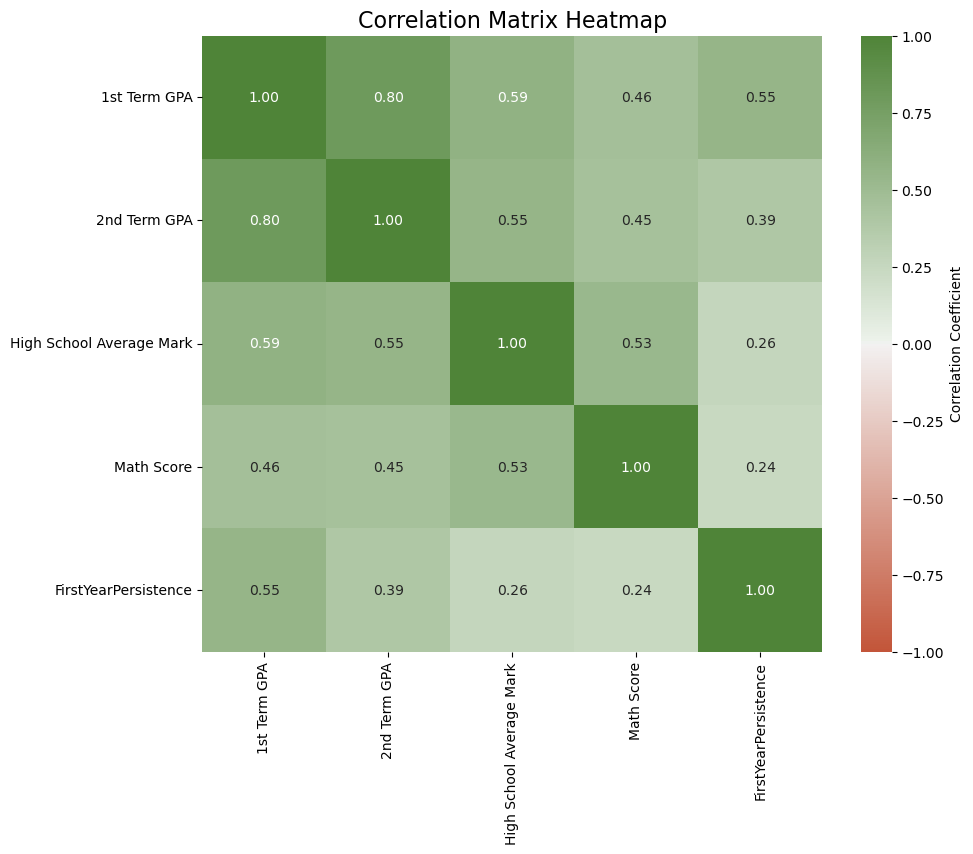

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming visualization_heat is already defined and contains your data
visualization_heat['FirstYearPersistence'] = visualization_heat['FirstYearPersistence'].astype('float64')

# Select only float64 columns for correlation
vis_cor = visualization_heat.select_dtypes('float64')

# Calculate correlation
corr = vis_cor.corr()

# Create the heatmap with a custom diverging color palette (orange and green)
plt.figure(figsize=(10, 8))  
sns.heatmap(
    corr, 
    annot=True,  
    fmt=".2f",   
    cmap=sns.diverging_palette(20, 120, as_cmap=True),  # Custom orange-green palette
    vmin=-1, vmax=1,  
    cbar_kws={'label': 'Correlation Coefficient'},
    annot_kws={"size": 10}
)

# Set title
plt.title("Correlation Matrix Heatmap", fontsize=16)

# Display the plot
plt.show()


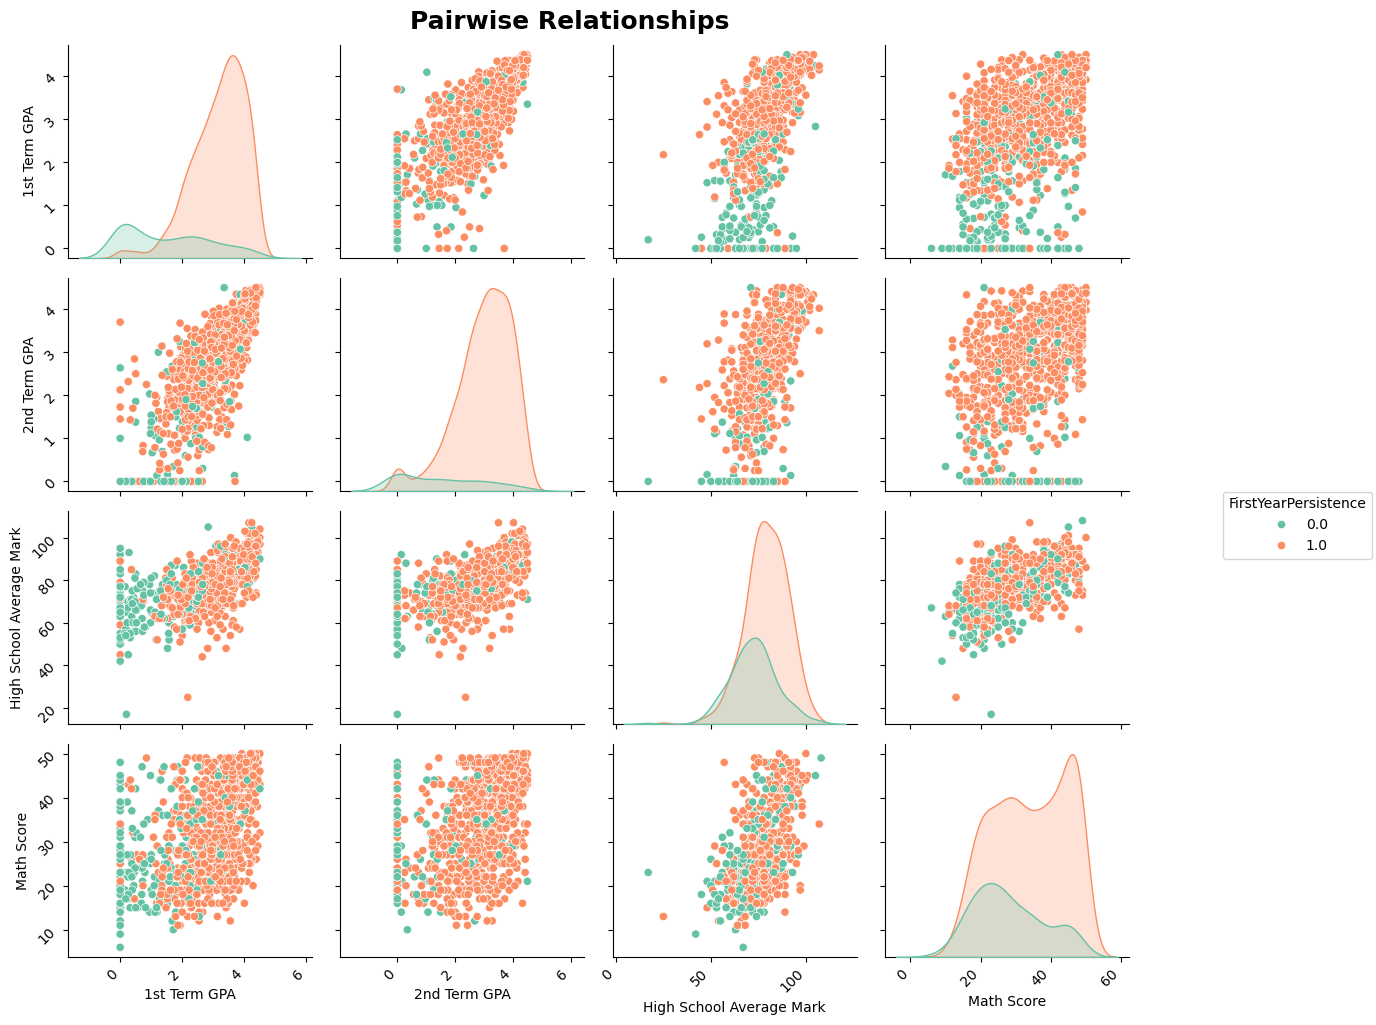

In [ ]:


custom_palette = sns.color_palette("Set2", n_colors=len(visualization_heat["FirstYearPersistence"].unique()))
g = sns.pairplot(visualization_heat, hue="FirstYearPersistence", palette=custom_palette)

# Rotate tick labels if needed
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
    for label in ax.get_yticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

# Adjust layout
plt.tight_layout()

# Move the legend outside the plot area
g._legend.set_bbox_to_anchor((1.2, 0.5))
g._legend.set_frame_on(True)



plt.suptitle("Pairwise Relationships", y=1.02, fontsize=18, fontweight='bold')

plt.show()


In [ ]:
df_persistence=pd.DataFrame(visualization["FirstYearPersistence"].value_counts(dropna=False)).reset_index()



persistence_map={"1.0": "persisted", "0.0": "did not persist"}

df_persistence['FirstYearPersistence'] = df_persistence['FirstYearPersistence'].map(persistence_map)

In [ ]:
df_persistence

,FirstYearPersistence,count
0,persisted,1138
1,did not persist,299


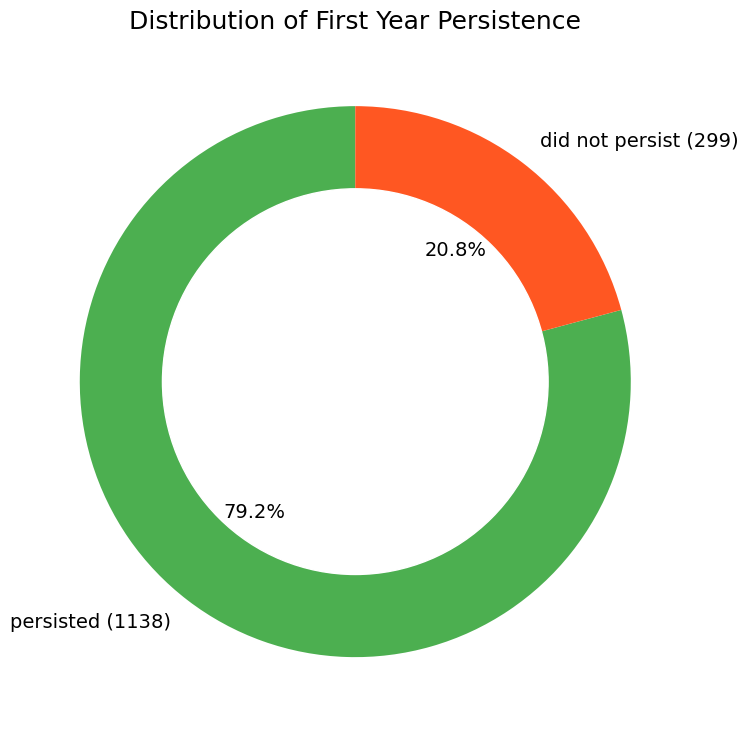

In [ ]:
import matplotlib.pyplot as plt

# Create labels with counts
df_persistence["labels_with_count"] = (
    df_persistence["FirstYearPersistence"] + " (" + df_persistence["count"].astype(str) + ")"
)

# Adjust font sizes and style
plt.rcParams['font.size'] = 14  # Set a larger global font size

# Define custom colors dynamically based on the "FirstYearPersistence" values
colors = [
    '#FF5722' if label == "did not persist" else '#4CAF50' if label == "persisted" else '#9E9E9E'
    for label in df_persistence["FirstYearPersistence"]
]

# Create the donut chart
fig, ax = plt.subplots(figsize=(8, 8))  # Set figure size
wedges, texts, autotexts = ax.pie(
    df_persistence["count"],
    labels=df_persistence["labels_with_count"],  # Use the new labels with counts
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 14}  # Increase font size for labels and percentages
)

# Add a central circle to create the donut effect
center_circle = plt.Circle((0, 0), 0.70, color='white')
ax.add_artist(center_circle)

# Add a title with a larger font size
plt.title("Distribution of First Year Persistence", fontsize=18)

# Improve layout to prevent clipping of labels
plt.tight_layout()

# Display the donut chart
plt.show()


In [ ]:
df_notpersist = visualization_heat[visualization_heat["FirstYearPersistence"]==0.0]

In [ ]:
df_notpersist.shape

(299, 14)

In [ ]:
df_notpersist

,1st Term GPA,2nd Term GPA,First Language,Funding,Fast Track,Coop,Residency,Gender,Prev Education,Age Group,High School Average Mark,Math Score,English Grade,FirstYearPersistence
6,2.210526,1.375000,English,GPOG_FT,No,Yes,Domestic,Male,HighSchool,0 to 18,68.0,20.0,Level-160,0.0
21,3.086957,2.656250,English,GPOG_FT,No,No,Domestic,Male,HighSchool,0 to 18,80.0,28.0,Level-170,0.0
33,2.125000,1.409091,Other,GPOG_FT,No,No,Domestic,Male,HighSchool,19 to 20,81.0,31.0,Level-170,0.0
46,1.105263,0.000000,English,GPOG_FT,No,No,Domestic,Male,PostSecondary,19 to 20,82.0,22.0,Level-160,0.0
50,1.780000,NaN,English,GPOG_FT,No,Yes,Domestic,Male,HighSchool,0 to 18,87.0,28.0,Level-170,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,2.522727,0.000000,English,GPOG_FT,No,No,Domestic,Male,HighSchool,36 to 40,72.0,39.0,Level-170,0.0
1416,0.391304,NaN,English,Second Career Program,No,No,Domestic,Female,0,41 to 50,69.0,33.0,Level-170,0.0
1423,0.652174,NaN,English,GPOG_FT,No,No,Domestic,Male,HighSchool,19 to 20,78.0,31.0,Level-160,0.0
1426,1.315789,0.000000,English,GPOG_FT,No,Yes,Domestic,Male,HighSchool,21 to 25,64.0,28.0,Level-170,0.0


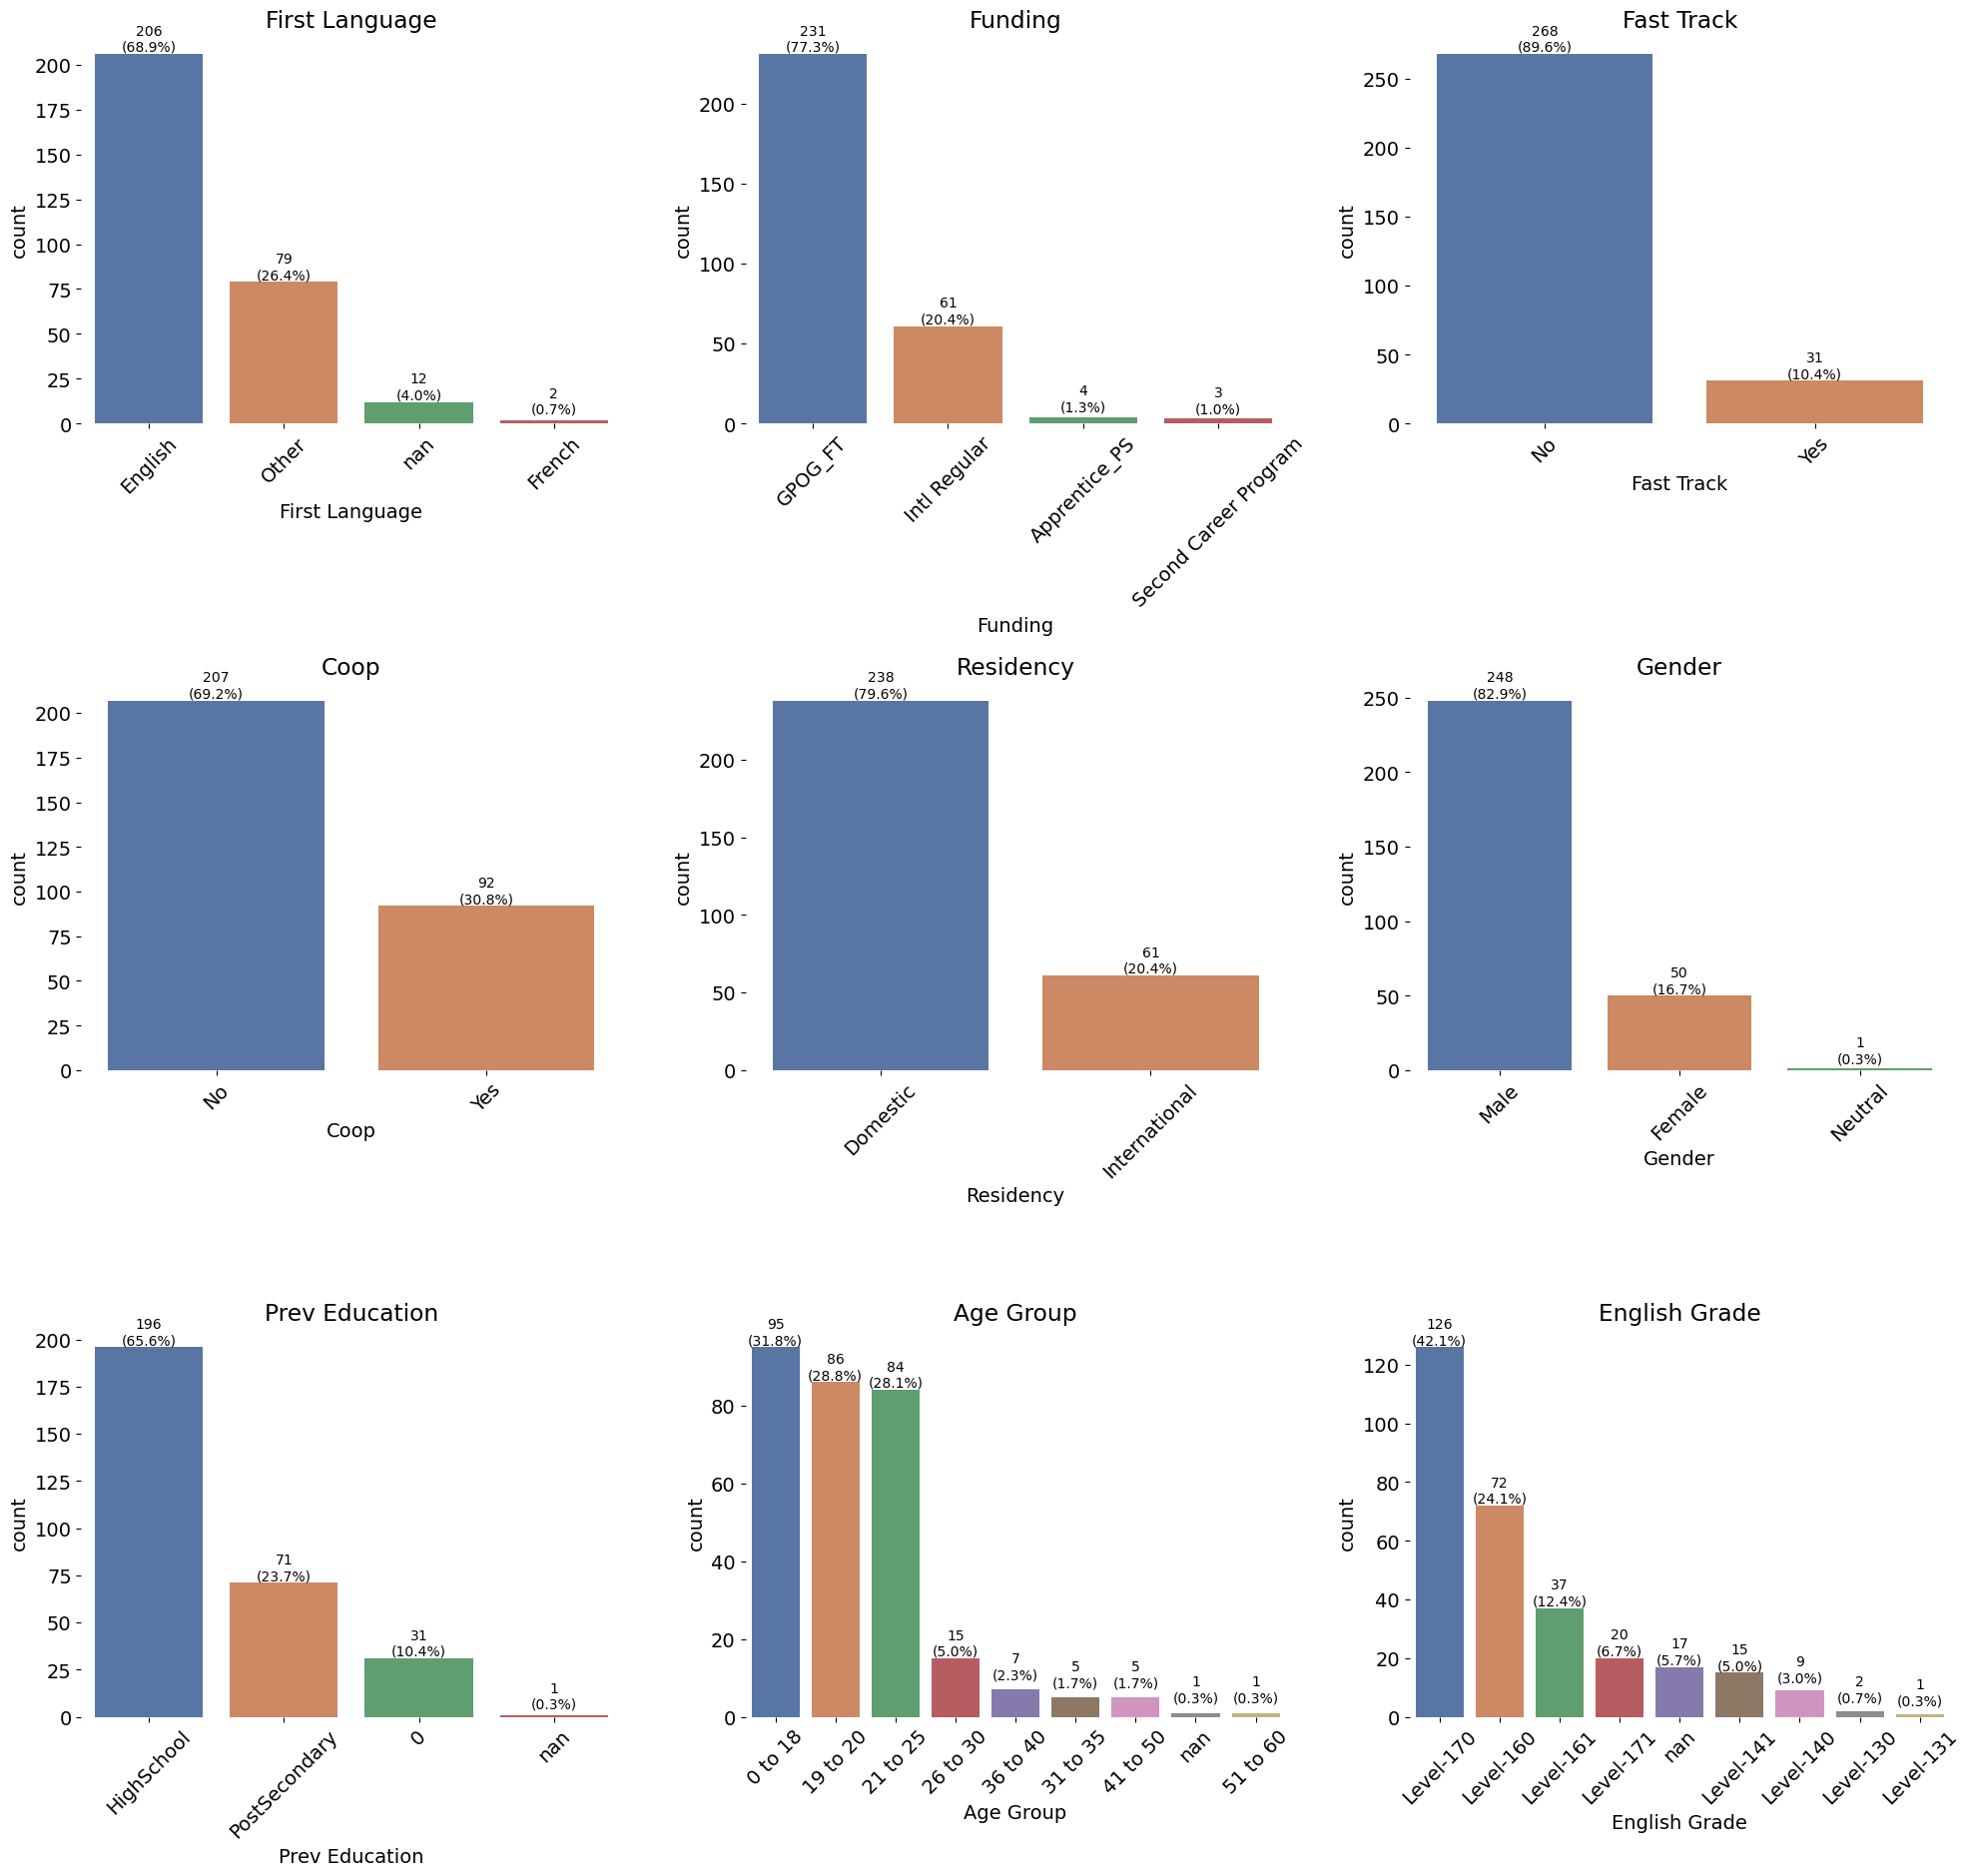

In [ ]:
cat_columns = ['First Language', 'Funding',  'Fast Track', 'Coop', 'Residency', 'Gender', 'Prev Education', 'Age Group', 'English Grade', ]


fig, axes = plt.subplots(4, 3, figsize=(20, 24))  # Adjust size for clarity

# Flatten axes for easy iteration
axes = axes.flatten()

for idx,i in enumerate(cat_columns):
    df = pd.DataFrame(df_notpersist[i].value_counts()).reset_index()
    df.columns = [i, "count"]
    df["percentage"] = (df["count"] / df["count"].sum()) * 100
 
    sns.barplot(df, x = i, y = "count", ax=axes[idx], palette = "deep")
    axes[idx].set_title(f"{i}")
    axes[idx].tick_params(axis='x', rotation=45)

      # Annotate counts and percentages on the bars
    for p, perc, count in zip(axes[idx].patches, df["percentage"], df["count"]):
        height = p.get_height()
        if height > 10:  # Place annotation above the bar for larger bars
            axes[idx].annotate(f'{count}\n({perc:.1f}%)',
                               (p.get_x() + p.get_width() / 2., height),
                               ha='center', va='bottom', fontsize=10)
        else:  # Place annotation inside the bar for smaller bars
            axes[idx].annotate(f'{count}\n({perc:.1f}%)',
                               (p.get_x() + p.get_width() / 2., height + 2),
                               ha='center', va='bottom', fontsize=10, color='black')
    
    # Remove the box (spines)
    for spine in axes[idx].spines.values():
        spine.set_visible(False)

for j in range(len(cat_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
visualization['Gender'].value_counts()

Gender
Male       1111
Female      325
Neutral       1
Name: count, dtype: int64

In [ ]:
df_gender_persist = visualization[['Gender', 'FirstYearPersistence']]

In [ ]:
df_gender_persist

,Gender,FirstYearPersistence
0,Male,1.0
1,Male,1.0
2,Female,1.0
3,Male,1.0
4,Female,1.0
...,...,...
1432,Male,0.0
1433,Female,1.0
1434,Male,1.0
1435,Female,1.0


In [ ]:
import pandas as pd

# Assuming your data is loaded into df_gender_persist
# Create a pivot table to separate Persistence and Non-Persistence by Gender
pivot_df = df_gender_persist.pivot_table(index='Gender', 
                                         columns='FirstYearPersistence', 
                                         aggfunc='size', 
                                         fill_value=0)

# Rename the columns for clarity
pivot_df.columns = ['Non_Persistence', 'Persistence']


pivot_df

,Non_Persistence,Persistence
Gender,,
Female,50,275
Male,248,863
Neutral,1,0


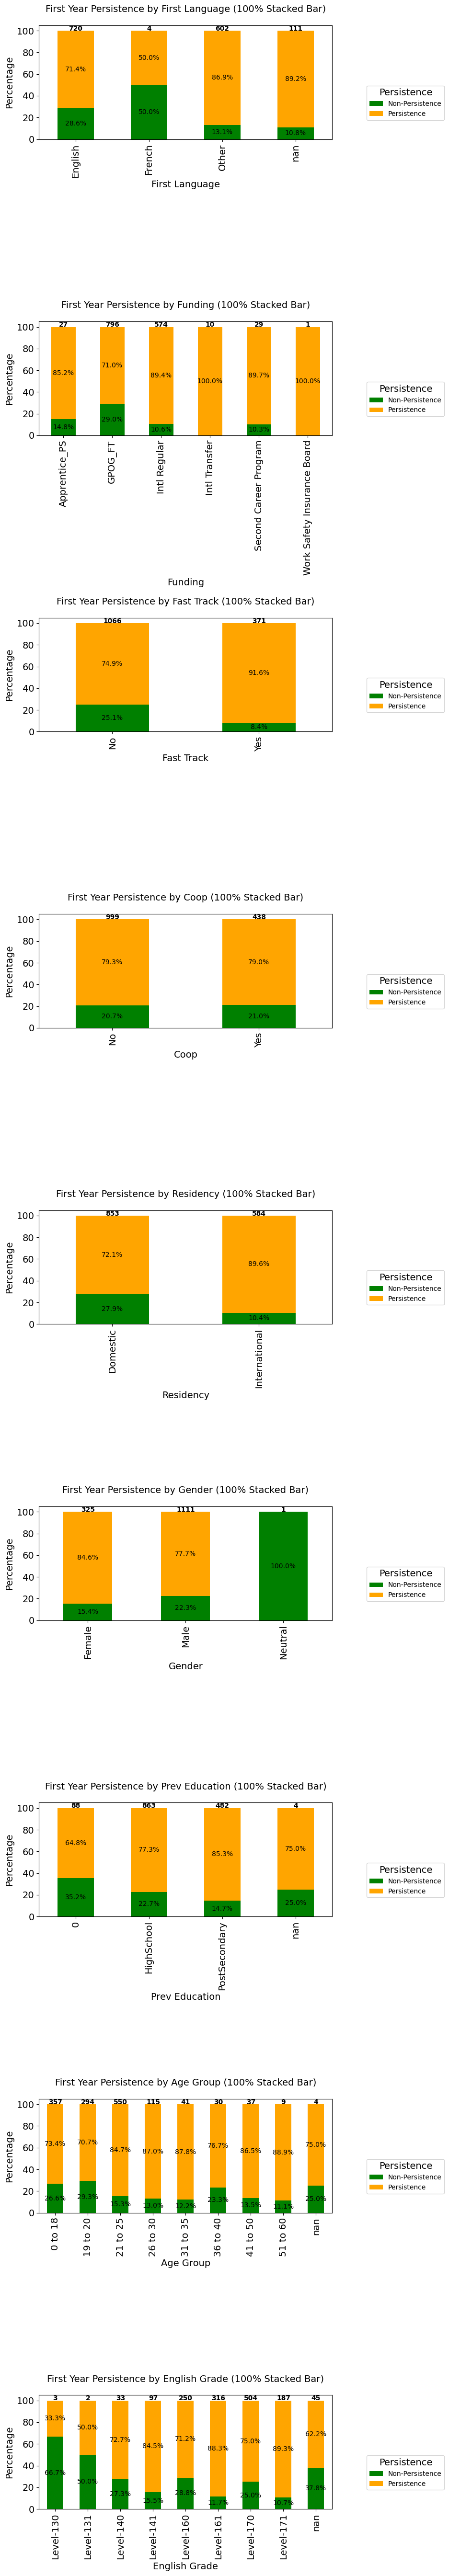

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your original dataframe and 'gender' is one of the categorical columns
categorical_columns = ['First Language', 'Funding', 'Fast Track', 'Coop', 'Residency', 'Gender', 'Prev Education', 'Age Group', 'English Grade']
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, 6 * len(categorical_columns)))

if len(categorical_columns) == 1:
    axes = [axes]  # Ensure axes is iterable if there's only one plot

# Iterate through the categorical columns and create plots
for ax, column in zip(axes, categorical_columns):
    # Create pivot table for percentage calculation
    pivot_df = visualization.groupby([column, 'FirstYearPersistence']).size().unstack(fill_value=0)
    pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100
    total_counts = pivot_df.sum(axis=1)  # Calculate total counts for each group

    # Plot the 100% stacked bar chart
    pivot_df_percentage.plot(kind='bar', stacked=True, ax=ax, color=['green', 'orange'])

    # Add percentage annotations inside each bar segment
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,  # Center horizontally
                    bar.get_y() + height / 2,  # Center vertically in the bar
                    f'{height:.1f}%',  # Format as percentage
                    ha='center',  # Align horizontally
                    va='center',  # Align vertically
                    fontsize=10,
                    color='black'
                )

    # Add total count annotations above each bar
    for idx, total in enumerate(total_counts):
        ax.text(
            idx, 105,  # Position above each bar
            f'{total}',  # Display total count
            ha='center',  # Center-align the text
            va='top',  # Align text at the bottom of its position
            fontsize=10,
            fontweight='bold',
            color='black'
        )

    # Add labels and title for each subplot
    ax.set_ylabel('Percentage')
    ax.set_xlabel(column)
    ax.set_title(f'First Year Persistence by {column} (100% Stacked Bar)', fontsize=14, pad=20)  # Add space with pad
    ax.legend(title='Persistence', labels=['Non-Persistence', 'Persistence'], fontsize=10, loc='upper center', bbox_to_anchor=(1.25,0.5), ncol=1)  # Move legend below

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# PCA

In [ ]:
visualization.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   1st Term GPA              1420 non-null   float64
 1   2nd Term GPA              1277 non-null   float64
 2   First Language            1437 non-null   object 
 3   Funding                   1437 non-null   object 
 4   School                    1437 non-null   object 
 5   Fast Track                1437 non-null   object 
 6   Coop                      1437 non-null   object 
 7   Residency                 1437 non-null   object 
 8   Gender                    1437 non-null   object 
 9   Prev Education            1437 non-null   object 
 10  Age Group                 1437 non-null   object 
 11  High School Average Mark  694 non-null    float64
 12  Math Score                975 non-null    float64
 13  English Grade             1437 non-null   object 
 14  FirstYea